<a href="https://colab.research.google.com/github/azheng456/2020-Xtern-Data-Science/blob/main/XternDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
#import pandas, matplotlib, and numpy for csv reading, data analysis, and visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [122]:
#use pandas read csv function to read in the provided data
data = pd.read_csv('2020-XTern-DS.csv')

#clean up data for readability in Python
#Empty values in Reviews and Votes column are set to 0
#However, this can't be applied to rating as a rating of 0 means something (bad)
#Reviews and Votes are also changed to an integer format 
data['Reviews'].replace({'-':0},inplace=True)
data['Reviews'] = data['Reviews'].astype(int)
data['Votes'].replace({'-':0},inplace=True)
data['Votes'] = data['Votes'].astype(int)
#removed the $ sign, changed values such as x,yz to x.yz
#and changed type to float
data['Average_Cost'] = data['Average_Cost'].str.replace('$','')
data['Average_Cost'] = data['Average_Cost'].str.replace(',','.')
data['Cost'] = data['Average_Cost'].astype(float)
#do the same with minimum order and average cost
#for cook time, all values are in units of minutes so we can remove that
#and change format to int
data['Minimum_Order'] = data['Minimum_Order'].str.replace('$','')
data['Minimum_Order'] = data['Minimum_Order'].astype(float)
data['Average_Cost'] = data['Average_Cost'].str.replace('$','')
data['Average_Cost'] = data['Average_Cost'].astype(float)
data['Cook_Time'] = data['Cook_Time'].str.replace('minutes','')
data['Cook_Time'] = data['Cook_Time'].astype(int)


**Finding #1**

In [126]:
#slice the dataset to only include controversial restaurants where there
#are over 1000 reviews in a new dataset called 'controv'
controv = data.loc[data['Reviews']>1000]

#We take a look at the ratio of wait times that are over 45 mins in both
#regular restaurants and our version of 'controversial' restaurants
a=b=c=d=0
for x in data['Cook_Time']:
  if x>=45:
    a+=1
  b+=1
for x in controv['Cook_Time']:
  if x>=45:
    c+=1
  d+=1

print("The percentage that restaurants have a cook time that takes at least 45 minutes in...")
#output as a percentage as that is easiest for us to understand the value
#and process what it means
print("All Restaurants: " + str(round(a/b*100,2)) + "%")
print("Controversial Restaurants: " + str(round(c/d*100,2)) + "%")

The percentage that restaurants have a cook time that takes at least 45 minutes in...
All Restaurants: 33.09%
Controversial Restaurants: 67.65%


This finding shows that controversial restaurants (not necessarily bad, but have a high number of reviews) have a significantly higher average wait time. This could also be good or bad, but it shows the popularity of these restaurants. Customers who want to try popular restaurants with a lot of reviews may have to wait much longer than other restaurants.

**Finding #2**

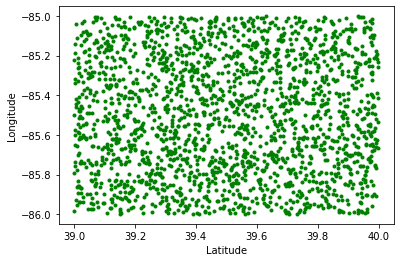

In [100]:
#Let's take a look at how the restaurants are spread out
#based on latitude and longitude
plt.plot(data['Latitude'], data['Longitude'], 'go',markersize=3)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

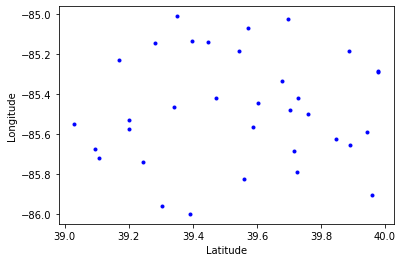

In [102]:
#get controversial restaurants (we are defining it as restaurants having
#over 1000 reviews)
data['intReviews'] = data['Reviews'].astype(int)
controv = data.loc[data['intReviews']>1000]



plt.plot(controv['Latitude'], controv['Longitude'], 'bo',markersize=3)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [113]:
data['Cook_Time'].describe()

count    2019.000000
mean       36.921743
std        11.804352
min        10.000000
25%        30.000000
50%        30.000000
75%        45.000000
max       120.000000
Name: Cook_Time, dtype: float64